# 0. Simulate phone dataset
## A

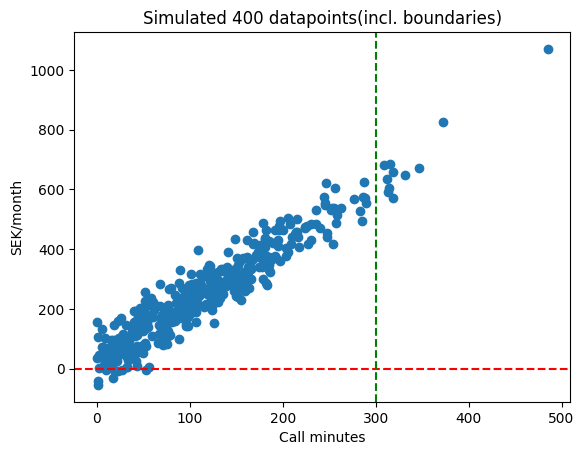

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

plt.scatter(x, y)
plt.title("Simulated 400 datapoints(incl. boundaries)")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.axhline(y=0, color="red", linestyle="--")
plt.axvline(x=300, color="green", linestyle="--")

# B

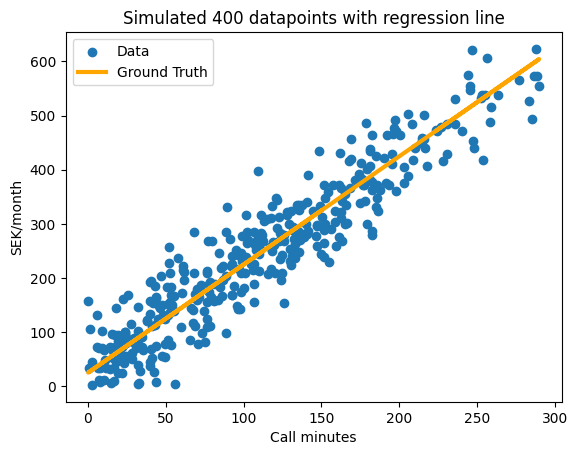

In [30]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.normal(100, 100, size=400) # normalfördelning

x = np.abs(x) # tar bort negativa nummer (absolutvärde)

epsilon = np.random.normal(0, 50, size=400)

y = 2*x + 25 + epsilon

# Tar bort punkter över 300, och under 0
mask = (x < 300) & (y > 0)
x = x[mask]
y = y[mask]


plt.scatter(x, y)
plt.plot(x, 25 + 2 * x, color='orange', linewidth=3) # regressionslinje med sanna parametrar
plt.gca().legend(("Data", "Ground Truth")) # legend uppe i vänstra hörnet
plt.title("Simulated 400 datapoints with regression line")
plt.xlabel("Call minutes")
plt.ylabel("SEK/month")
plt.show()


In [31]:
df = pd.DataFrame({'x': x, 'y': y})
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,381.0,110.608181,70.695220,0.252936,49.652435,106.428002,161.167629,289.679298
y,381.0,246.203236,143.270223,2.706290,137.119904,241.306311,335.261498,623.193172


# 1. Train | test split

In [32]:
# Försimplad version genom att använda sklearn, kan göra det manuellt via sättet som görs i L0-linear_regression-code-along
from sklearn.model_selection import train_test_split

df_x = df["x"]
df_y = df["y"]


def train_split(x, y):
    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=.7, random_state=42)

    return f"X_train: {X_train.shape} X_test: {X_test.shape}, y_train: {y_train.shape} y_test{y_test.shape}"

train_split(df_x, df_y)

'X_train: (114,) X_test: (267,), y_train: (114,) y_test(267,)'

## Riktig funktion enligt code-along

In [54]:
df_X = df["x"]
df_y = df["y"]

def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float, random_state: int, replace: bool) -> tuple:
    
    # Bestämmer andel procent training data
    train_fraction = int(len(X) * train_fraction)

    # plockar ut sample training data
    X_sample_train = X.sample(n= train_fraction, random_state=random_state, replace=replace)
    y_sample_train = y.sample(n= train_fraction, random_state=random_state, replace=replace)

    # Plockar ut sample test data
    X_sample_test = X.drop(X_sample_train.index)
    y_sample_test = y.drop(y_sample_train.index)

    # Skapar nya dataframes med training-, och test-data
    X_train, y_train = pd.DataFrame(X_sample_train), X_sample_test
    X_test, y_test = pd.DataFrame(y_sample_train), y_sample_test

    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)

    return (X_train, y_train, X_test, y_test)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, train_fraction=0.7, random_state=42, replace=False)

In [57]:
X_train.shape

(266, 2)

In [ ]:
from sklearn.model_selection import train_test_split


regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
predict = lambda x, beta: np.dot(x, beta)
beta_hat = regression_fit(X_train, y_train)
regression_line = lambda x, b0, b1: b0 + (b1 * x)
fit_regression_line = regression_line(X_train, beta_hat.T[0], beta_hat.T[1])


plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train)
plt.plot(X_train, 25 + 2 * X_train, color='green', linewidth=1)
plt.plot(X_train, fit_regression_line, color="red", linewidth=1)

In [81]:
fit_regression_line

,Intercept,x,y
266,1.0,NaN,NaN
192,1.0,NaN,NaN
46,1.0,NaN,NaN
55,1.0,NaN,NaN
57,1.0,NaN,NaN
...,...,...,...
41,1.0,NaN,NaN
294,1.0,NaN,NaN
206,1.0,NaN,NaN
254,1.0,NaN,NaN


(266,)

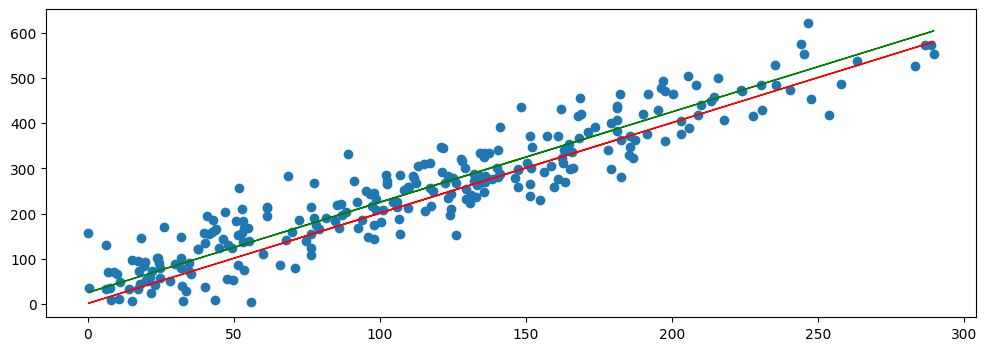

In [39]:
from sklearn.model_selection import train_test_split

df_x = df["x"]
df_y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.3, random_state=42)

true_slope, true_intercept = 2, 1
y_true = true_slope * X_train + true_intercept

plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train)
plt.plot(X_train, 25 + 2 * X_train, color='green', linewidth=1)
plt.plot(X_train, y_true, color="red", linewidth=1)

X_train.shape

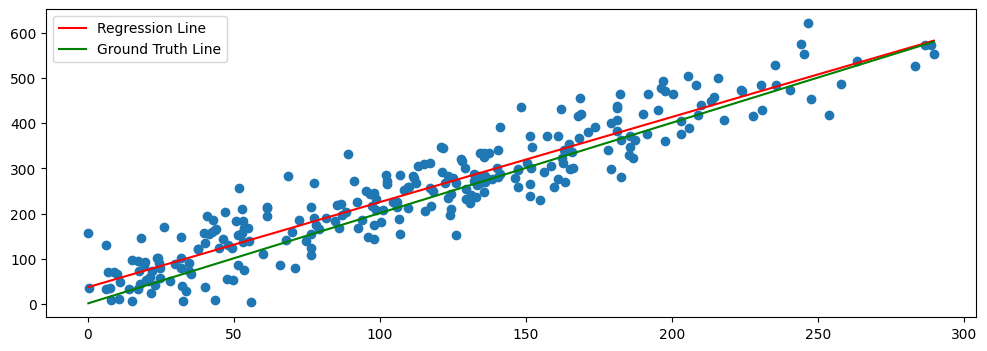

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training data
regressor = LinearRegression()
regressor.fit(X_train.values.reshape(-1, 1), y_train)

# Compute the regression line
x_line = np.linspace(X_train.min(), X_train.max(), 100)
y_line = regressor.predict(x_line.reshape(-1, 1))

# Compute the ground truth line (assuming a linear relationship)
true_slope, true_intercept = 2, 1
y_true = true_slope * x_line + true_intercept

# Plot the training data, regression line, and ground truth line
plt.figure(figsize=(12,4))
plt.scatter(X_train, y_train)
plt.plot(x_line, y_line, color='red', label='Regression Line')
plt.plot(x_line, y_true, color='green', label='Ground Truth Line')
plt.legend()
plt.show()


(100,)